### Start with Me &nbsp;|&nbsp;&nbsp;用 `Python` 制作词云 0 — 初印象

* `『 Start with Me 』` 是 `Oreo` 心血来潮开的新坑
* `奥利奥同学` 向来三分钟热度，也不知道这次会坚持多久，先开始再说．．．
* 大概和最近很流行的 `GRWM (Get Ready with Me)` 类似吧
* 主要还是记录、分享一下最近开始尝试做的事情
* 和我一起开始新的生活呀

**生活中随处可见的词云**

*PPT报告、数据分析、宣传海报、表情包*

用来**创建词云的工具**有很多，比如: 易词云、微词云、图悦、BDP个人版、Tagul、Wordle、WordltOut ...

这些工具可以让用户通过简单的操作生成~~想要的~~词云

但是有的需要付费、有的对中文支持效果不佳、有的无法下载图片、有的展示效果单一 ...

那不如尝试使用 **`Python`** 制作符合自己需求的词云吧

-- 会不会很难呀?

-- Start with Me, 一点都不难

## 准备工作

### 安装
生成词云需要使用的包：
* `wordcloud` -- 生成词云 https://github.com/amueller/word_cloud
* `matplotlib` -- 展示词云 https://matplotlib.org/gallery/index.html
* `jieba` -- 中文分词 https://github.com/fxsjy/jieba
* `pkuseg` -- 中文分词 https://github.com/lancopku/PKUSeg-python （安利一下，这是最近发现的北京大学的中文分词工具）

中文文本生成词云的字体:
* 思源黑体 : SourceHanSansHWSC-Regular.otf https://github.com/adobe-fonts

### 数据
生成词云第一步当然是要先有词啦

* 生成词云的英文文档，例如 : 麦琪的礼物 -- `magi_gift.txt`
* 生成词云的中文文档，例如 ：我不喜欢这世界我只喜欢你 -- `only_you.txt`

准备好这些就可以开始啦, Start with Me !

## 如何将英文文本生成词云
用英文文本生成词云比较简单，因为英文文本中的单词是以空格作为分隔符

### 读取文本
* 打开 `magi_gift.txt` ，与本文件在同一目录下
* 将文本中的内容读取出来，并保存到`magi_gift_text`变量中


In [1]:
filename = "magi_gift.txt"
with open(filename) as f:
    magi_gift_text = f.read()

### 生成词云
* 调用词云包`wordcloud`
* 用 `magi_gift_text` 存储的内容生成词云 `WordCloud().generate(magi_gift_text)`

* 和我一起看 `generate(text)` 的官方文档吧！不能让我一个人看不懂呜呜呜(其实就我自己看不懂)
  
  `generate(text)` : Generate wordcloud from text.
  
   翻译一下就是，由输入的 text 生成词云，`wordcloud` 是基于PIL(`pillow`)，所以是用 PIL 方式展示生成的词云图像

In [2]:
from wordcloud import WordCloud
magi_gift_wordcloud = WordCloud().generate(magi_gift_text)

### 展示词云
* 调用 `matplotlib`
* 显示图片 `plt.imshow(magi_gift_wordcloud)`

* 和我一起看 `matplotlib.pyplot` 官方文档吧！



>`imshow(X)` : Display data X as an image on a 2D regular raster
     
     X : PIL image, 通过`generate(text)` 生成的是 PIL 图像，这个 PIL 图像作为 `imshow(X)` 的输入，输出这个词云图像
     
  
>`axis(*agrs, emit = True, **kwargs)` : Convenience method to get or set some axis properties
  
     本次使用的调用形式为：`axis(option)` ———— `option` 可以为 `bool/str` 类型，其中 `off` : Turn off axis lines and labels. Same as `False`
     
     翻译一下，`"off"/False` 大概就是不显示坐标轴标签，你可以删除这一行看看输出的结果有什么不一样哦
  

(-0.5, 399.5, 199.5, -0.5)

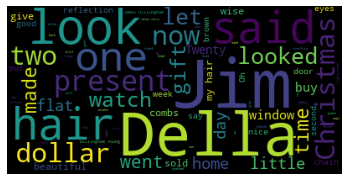

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(magi_gift_wordcloud)
plt.axis(False)

### 保存词云图片
* 你已经会做词云啦！（其实你也会用 `matplotlib` 了）

* 那最后就把这个图片保存下来吧, 这里要用到 `wordcloud.WordCloud` 中的 `to_file(filename)`

* 再和我一起看 `wordcloud.WordCloud` 官方文档吧！

>to_file(filename) : Export to image file
  
    就是将这个词云保存为一个文件名为 filename 的文件，例如：magi_gift_wordcloud.jpg
  
    保存成功之后你就可以在同目录下发现这个图片啦

In [4]:
magi_gift_wordcloud.to_file("magi_gift_wordcloud.jpg")

## 如何将中文文本生成词云
*你已经可以将英文文本生成词云了，那么来试试中文文本吧*

* 中文和英文文本有什么不同呢？

### 读取文本
* 先打开一个中文文本试试吧, 按照上面的方法打开 ...
```
filename = "only_you.txt"
with open(filename) as f:
    only_you_text = f.read()
```
* 怎么报错了呢？让我们来看看报错信息吧！

  `UnicodeDecodeError: 'gbk' codec can't decode byte 0x80 in position 4: illegal multibyte sequence`
* 原来是用 gbk 解码时出错了，为什么呢？ 
* 这个文档是中文文本，字符串本身是 utf-8 ，所以用 gbk 解吗肯定会出错呀，那么在打开文档的时候添加 utf-8 的解码方式吧 
  
  `with open(filename, encoding ='utf-8') as f`

In [5]:
filename = "only_you.txt"
with open(filename, encoding = 'utf-8') as f:
    only_you_text = f.read()

### 文本分词

* 英文文本是以空格作为分隔符，那怎么知道中文文本中有哪些词呢?
* 中文分词工具，最常用的就是 `jieba` 

>`jieba` : 结巴中文分词，做最好的 Python 中文分词组件
`jieba.cut()` 对需要分词的字符串进行分词处理，返回一个可迭代的generator

* 分词之后的文本用空格将词分割

In [6]:
import jieba
only_you_text = " ".join(jieba.cut(only_you_text))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\aolin\AppData\Local\Temp\jieba.cache
Loading model cost 1.426 seconds.
Prefix dict has been built successfully.


* 最近新发现的中文分词工具 `pkuseg`

>`pkuseg` : 一个多领域中文分词工具包, 其简单易用,支持细分领域分词,有效提升了分词准确度<br>
对文件分词,将input.txt的文件分词输出到output.txt中<br>
`pkuseg.test('input.txt', 'output.txt')`
* 将分词结果输出到 seg_only_you.txt 中,读取这个文本以进行词云处理

In [7]:
import pkuseg

pkuseg.test('only_you.txt', 'seg_only_you.txt')
filename = "seg_only_you.txt"
with open(filename, encoding = 'utf-8') as f:
    seg_only_you_text = f.read()

total_time:	83.069


### 显示词云
* 按照处理英文文本时的操作会发现生成的词云对中文的显示有问题, 这是因为缺少中文字体文件
* 设置字体参数 `font_path` ,将支持中文的字体传给这个参数

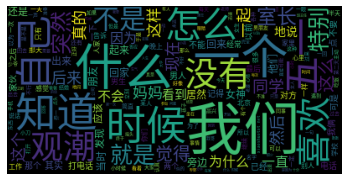

In [8]:
from wordcloud import WordCloud
only_you_wordcloud = WordCloud(font_path = "SourceHanSansHWSC-Regular.otf").generate(only_you_text)
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(only_you_wordcloud)
plt.axis(False)
only_you_wordcloud.to_file("only_you_wordcloud_jieba.jpg")

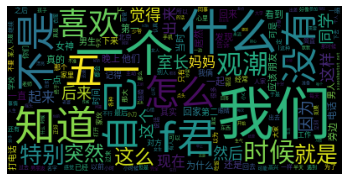

In [9]:
from wordcloud import WordCloud
only_you_wc = WordCloud(font_path = "SourceHanSansHWSC-Regular.otf").generate(seg_only_you_text)
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(only_you_wc)
plt.axis("off")
only_you_wc.to_file("only_you_wordcloud_pkuseg.jpg")

## 完成啦! 👍
* 两种不同的中文分词工具, 结果相差不大
* 相比较jieba, pkuseg 分词结果中有 "f君"
* 怎样才能让分词结果更准确呢?
* 怎样让词云以更好看的样式呈现的?